In [1]:
!python main.py --mode train

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0410 19:21:05.455485 139815451542336 module_wrapper.py:139] From main.py:16: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

[*] Building model

W0410 19:21:05.460097 139815451542336 module_wrapper.py:139] From /mnt/d/XiaoranZhang/Projects/Misc/Code/dl_unc/dl-uncertainty/aleatoric-uncertainty/model.py:69: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0410 19:21:05.462207 139815451542336 module_wrapper.py:139] From /mnt/d/XiaoranZhang/Projects/Misc/Code/dl_unc/dl-uncertainty/aleatoric-uncertainty/model.py:24: The name tf.variable_scope is deprecated. Plea

In [2]:
!python main.py --mode test --checkpoint model/model0/model

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0410 19:42:15.665577 139810181382976 module_wrapper.py:139] From main.py:16: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

[*] Building model

W0410 19:42:15.673172 139810181382976 module_wrapper.py:139] From /mnt/d/XiaoranZhang/Projects/Misc/Code/dl_unc/dl-uncertainty/aleatoric-uncertainty/model.py:69: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0410 19:42:15.676063 139810181382976 module_wrapper.py:139] From /mnt/d/XiaoranZhang/Projects/Misc/Code/dl_unc/dl-uncertainty/aleatoric-uncertainty/model.py:24: The name tf.variable_scope is deprecated. Plea

## One sample testing

In [1]:
import os
import pickle
import numpy as np

image_file = 'test.pkl'
image_dir = os.path.join('../mnist/', image_file)
with open(image_dir, 'rb') as f:
	mnist = pickle.load(f)
	images = mnist['X'] / 127.5 - 1
	labels = mnist['y'] # np.squeeze(labels).astype(int)

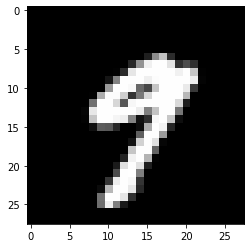

In [2]:
import matplotlib.pyplot as plt

idx = 20
image = images[idx]
label = labels[idx]

plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [3]:
print(np.max(image))
print(np.min(image))

1.0
-1.0


In [6]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
from model import Model
from solver import Solver

model_dir = './model/model0/model'

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
config.allow_soft_placement = True

model = Model(learning_rate=0.0003, mode='test')
solver = Solver(model)

with tf.Session(config=config) as sess:
			
	variables_to_restore = slim.get_model_variables(scope='encoder')
	variables_to_restore += slim.get_model_variables(scope='decoder')
	restorer = tf.train.Saver(variables_to_restore)
	restorer.restore(sess, model_dir)

	mean, logvar, loss1, loss2, loss = sess.run([model.mean, model.log_var, model.loss1, model.loss2, model.loss], feed_dict={model.images: image[np.newaxis]})

[*] Building model
INFO:tensorflow:Restoring parameters from ./model/model0/model


In [5]:
mean.shape

(1, 28, 28, 3)

In [6]:
logvar.shape

(1, 28, 28, 3)

In [7]:
loss1

0.22639838

In [8]:
loss1_np = np.exp(-logvar) *((mean-image)**2)

In [12]:
print(np.max((mean-image)**2))

3.010390719619327


In [13]:
print(np.max(np.exp(-logvar)))

48407.58


In [10]:
np.max(loss1_np)

5.757158061274869

In [ ]:
np.pow

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


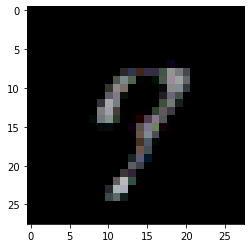

In [9]:
plt.imshow(mean[0])

In [10]:
np.max(mean)

0.731948

In [14]:
np.min(logvar)

-10.787412

In [17]:
print(np.exp(-np.min(logvar)))

48407.58
